In [151]:
import pandas as pd
#df = pd.read_excel("Datos_Iroman_austria_20170702_detail.xlsx")
df = pd.read_excel("Datos_Iroman_emilia-romagna_20170923_detail.xlsx")
df=df[df['overall_rank']!='---']
df=df[df['s_overal_rank']!='---']
df=df[df['b_overal_rank']!='---']
df=df[df['r_overal_rank']!='---']
dfxs = df.s_overal_rank.astype(int)
dfxb = df.b_overal_rank.astype(int)
#dfxr = df.r_overal_rank.astype(int)

data_r = df.run
list_run = [int(i[:2])*3600+int(i[3:5])*60+int(i[-2:]) if i!='---' else 0 for i in data_r]
dfxr = pd.DataFrame(list_run).rank().astype(int)



dfy = df.overall_rank.astype(int)

deflist=[]
for i in range (0, len(dfy)):
    deflist.append([dfxs.values[i],dfxb.values[i],dfxr.values[i]])

In [152]:
deflist

[[5, 1, array([3])],
 [10, 5, array([1])],
 [23, 3, array([2])],
 [2, 8, array([4])],
 [9, 6, array([7])],
 [3, 9, array([5])],
 [24, 4, array([16])],
 [7, 7, array([49])],
 [8, 21, array([15])],
 [24, 2, array([75])],
 [194, 11, array([9])],
 [20, 44, array([8])],
 [12, 22, array([47])],
 [48, 19, array([31])],
 [85, 16, array([26])],
 [103, 14, array([22])],
 [119, 15, array([37])],
 [106, 10, array([90])],
 [274, 30, array([12])],
 [46, 18, array([58])],
 [27, 33, array([44])],
 [50, 39, array([28])],
 [4, 59, array([42])],
 [126, 25, array([40])],
 [14, 40, array([65])],
 [171, 69, array([10])],
 [99, 36, array([43])],
 [178, 31, array([36])],
 [100, 104, array([6])],
 [13, 103, array([34])],
 [419, 24, array([30])],
 [119, 29, array([64])],
 [17, 34, array([88])],
 [139, 110, array([18])],
 [21, 12, array([160])],
 [41, 43, array([81])],
 [16, 46, array([93])],
 [35, 20, array([125])],
 [97, 73, array([51])],
 [259, 67, array([24])],
 [166, 23, array([94])],
 [28, 54, array([91])]

In [42]:
import statsmodels.api as sm # import statsmodels 
X = deflist
y = dfy
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.980     
Dependent Variable: overall_rank     AIC:                28320.5901
Date:               2017-10-08 19:23 BIC:                28338.0199
No. Observations:   2465             Log-Likelihood:     -14157.   
Df Model:           3                F-statistic:        4.072e+04 
Df Residuals:       2462             Prob (F-statistic): 0.00      
R-squared:          0.980            Scale:              5710.1    
----------------------------------------------------------------------
          Coef.     Std.Err.       t        P>|t|     [0.025    0.975]
----------------------------------------------------------------------
x1        0.0878      0.0027     32.2779    0.0000    0.0824    0.0931
x2        0.4367      0.0039    111.0662    0.0000    0.4290    0.4444
x3        0.4942      0.0034    147.4299    0.0000    0.4876    0.5007
-------------------------------------------------------------------
Omnibus:              930.410      Durbin-Watson:         0.956    
Prob(Omnibus):        0.000        Jarque-Bera (JB):      13702.787
Skew:                 1.374        Prob(JB):              0.000    
Kurtosis:             14.219       Condition No.:         8        
===================================================================

"""

In [43]:
aus_mregress_17 = ["aus_17", model.params[0],model.params[1],model.params[2]]

In [45]:
final_data = [frank_mregress_13, emilia_mregress_17, aus_mregress_17, cop_mregress_17]

In [46]:
print(final_data[0][0],final_data[0][2:4])
print(final_data[1][0],final_data[1][2:4])
print(final_data[2][0],final_data[2][2:4])
print(final_data[3][0],final_data[3][2:4])

frankfurt_13 [0.52267583773386406, 0.50598079530763551]
emilia_17 [0.43150045047276175, 0.51327686131769001]
aus_17 [0.43667909081905887, 0.49417635182453534]
cop_17 [0.43438030592359017, 0.49176309305451421]


In [47]:
emilia_mregress_17

['emilia_17', 0.07699181369090137, 0.43150045047276175, 0.51327686131769001]

### Programa para importar los datos y calcular las regresiones 

In [160]:
### Programita ###
import pandas as pd
import statsmodels.api as sm # import statsmodels 

ironmans = ["Datos_Iroman_emilia-romagna_20170923_detail.xlsx",
           "Datos_Iroman_copenhagen_20170820_detail.xlsx",
           "Datos_Iroman_Barcelona_20161002_detail.xlsx",
           "Datos_Iroman_frankfurt_20130707_detail.xlsx",
           "Datos_Iroman_austria_20170702_detail.xlsx",
           "Datos_Iroman_Lanzarote_20150523_detail.xlsx",
           "Datos_Iroman_Lanzarote_20130518_detail.xlsx",
           "Datos_Iroman_Lanzarote_20140517_detail.xlsx",
           "Datos_Iroman_Lanzarote_20160521_detail.xlsx",
           "Datos_Iroman_Lanzarote_20170520_detail.xlsx"]
final_data = []
for race in ironmans:
    df = pd.read_excel(race)
    df=df[df['overall_rank']!='---']
    df=df[df['s_overal_rank']!='---']
    df=df[df['b_overal_rank']!='---']
    df=df[df['r_overal_rank']!='---']
    dfxs = df.s_overal_rank.astype(int)
    dfxb = df.b_overal_rank.astype(int)
    #dfxr = df.r_overal_rank.astype(int)

    data_r = df.run
    list_run = [int(i[:2])*3600+int(i[3:5])*60+int(i[-2:]) if i!='---' else 0 for i in data_r]
    dfxr = pd.DataFrame(list_run).rank().astype(int)



    dfy = df.overall_rank.astype(int)

    deflist=[]
    for i in range (0, len(dfy)):
        deflist.append([dfxs.values[i],dfxb.values[i],dfxr.values[i]])
    
    X = deflist
    Xdf=pd.DataFrame(X)
    Xdf[3]=Xdf.apply(lambda row:row[2][0],axis=1)
    Xdf.head()
    X=Xdf[[0,1,3]].values

    
    y = dfy
    model_OLS = sm.OLS(y, X).fit()
    predictions = model_OLS.predict(X)
    model_OLS.summary2()

    final_data.append([race, model_OLS.params[0],model_OLS.params[1],model_OLS.params[2], model_OLS.rsquared, model_OLS.nobs])

In [72]:
bike_weight = []
run_weight = []
names = []
for race in final_data:
    bike_weight.append(race[2])
    run_weight.append(race[3])
    names.append(race[0])

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

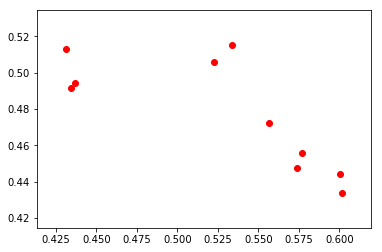

In [98]:
plt.scatter(np.array(bike_weight),np.array(run_weight), c='r')
#x=np.arange(0.42,0.62,0.05)
#y=1-x
#plt.plot(x,y)

In [105]:
final_data

[['Datos_Iroman_emilia-romagna_20170923_detail.xlsx',
  0.07699181369090137,
  0.43150045047276175,
  0.51327686131769001,
  1.0098228506934805,
  2089.0],
 ['Datos_Iroman_copenhagen_20170820_detail.xlsx',
  0.099261861071065549,
  0.43438030592359017,
  0.49176309305451421,
  0.96167865080224246,
  2444.0],
 ['Datos_Iroman_Barcelona_20161002_detail.xlsx',
  -0.046709736982167918,
  0.53385055904473877,
  0.51505019121617424,
  0.28888054714525935,
  2347.0],
 ['Datos_Iroman_frankfurt_20130707_detail.xlsx',
  -0.039328847887418167,
  0.52267583773386406,
  0.50598079530763551,
  0.98043084869499231,
  2447.0],
 ['Datos_Iroman_austria_20170702_detail.xlsx',
  0.087758937479952129,
  0.43667909081905887,
  0.49417635182453534,
  0.98024417573255596,
  2465.0],
 ['Datos_Iroman_Lanzarote_20150523_detail.xlsx',
  -0.040656254907041542,
  0.6013446771971348,
  0.43387496880828363,
  0.99678289474948734,
  1462.0],
 ['Datos_Iroman_Lanzarote_20130518_detail.xlsx',
  -0.037242220845208243,
  0.

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [142]:
#model = LinearRegression()
model = RandomForestRegressor()

In [143]:
X = deflist
y = dfy.values

In [155]:
Xdf=pd.DataFrame(X)
Xdf[3]=Xdf.apply(lambda row:row[2][0],axis=1)
Xdf.head()
X=Xdf[[0,1,3]].values

In [156]:
model.fit(X,y)

AttributeError: 'OLSResults' object has no attribute 'fit'

In [158]:
len(X)

1339

In [146]:
model.predict([[1,3,1]])

array([ 2.3])

In [148]:
#model.coef_
model.feature_importances_

array([  6.92304643e-04,   7.69900889e-01,   2.29406807e-01])

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline

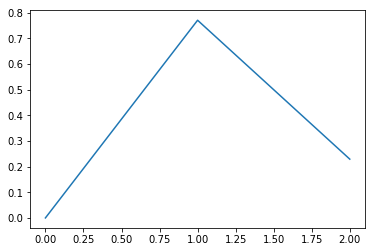

In [150]:
plt.plot(model.feature_importances_)

In [141]:
model.predict(X)

array([  -50.87917321,   -49.536605  ,   -48.26914304, ...,  1286.76680784,
        1330.76881663,  1355.002049  ])

In [139]:
X

array([[  18,    1,    2],
       [  17,    4,    1],
       [  20,    3,    5],
       ..., 
       [1357, 1360, 1121],
       [1166, 1357, 1214],
       [1194, 1315, 1319]], dtype=int64)